In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
iris = load_iris()

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
import pandas as pd
import numpy as np

data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
data['target'] = iris.target

In [19]:
data[data.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [20]:
df0 = data[:50]
df1 = data[50:100]
df2 = data[100:]

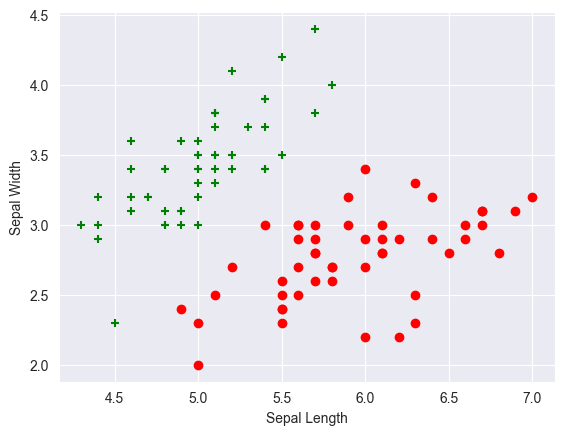

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker='o')

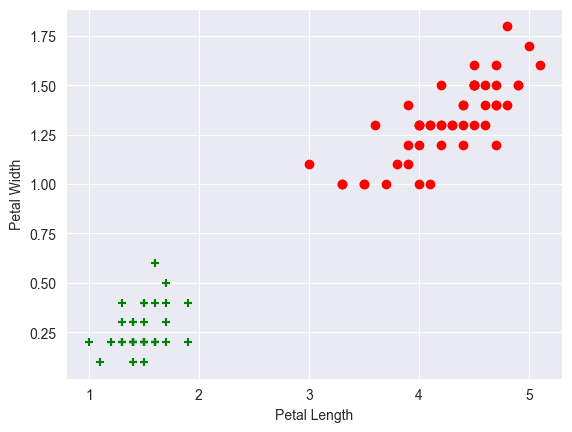

In [22]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', marker='o')

In [23]:
data['flower_name'] = data.target.apply(lambda x: iris.target_names[x])

In [24]:
from sklearn.model_selection import train_test_split

X = data.drop(['target', 'flower_name'], axis='columns')
y = data['target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))

120
30


In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
knn.score(X_test, y_test)

1.0

In [28]:
knn.predict([[4.8, 0.3, 3.0, 1.5]])

/Users/samgrant/Desktop/AI_Projects/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(120.72222222222221, 0.5, 'Actual')

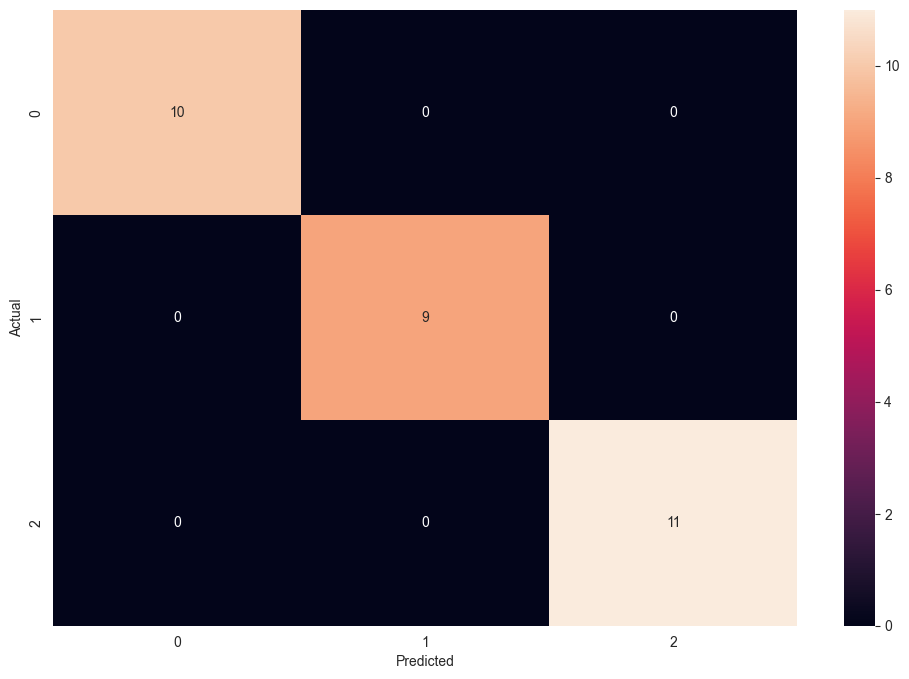

In [31]:
conf_mat = confusion_matrix(y_test, knn.predict(X_test))

plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')